

<div align="center">
<img align="center" src="https://stelar-project.eu/wp-content/uploads/2022/08/cropped-stelar-sq.png?raw=true" alt="pyJedAI" width="250"/>

<strong>Deduplication Use Case</strong>
</div>
<div align="center">
<img align="center" src="https://github.com/AI-team-UoA/.github/blob/main/AI_LOGO-1.png?raw=true" alt="pyJedAI" width="160"/>
<img align="center" src="https://agroknow.com/wp-content/uploads/2020/04/logo_agroknow_sm.png?raw=true" alt="pyJedAI" width="160"/>
<img align="center" src="https://github.com/Nikoletos-K/pyJedAI/blob/main/docs/img/pyjedai.logo.drawio.png?raw=true" alt="pyJedAI" width="250"/>
</div>

---

# Initialize data and pyJedAI
Execute cell to initialize application and read the data.

In [1]:
# %pip install pyjedai
# %pip install valentine

In [2]:
import pandas as pd
import json
def load_only_schema(file_path: str, filename: str):
       
    source_filename = f'{file_path}/{filename}_dbf.csv'
    target_filename = f'{file_path}/{filename}.csv'
    gtruth_filename = f'{file_path}/{filename}.json'
        
        
    df_source_tmp = pd.read_csv(source_filename).astype(str)
    df_target_tmp = pd.read_csv(target_filename).astype(str)
    

    source_schema = df_source_tmp.columns.tolist()
    df_source = pd.DataFrame(columns=source_schema)
    df_source.loc[0] = source_schema
    df_source = df_source.dropna(axis=1)

    target_schema = df_target_tmp.columns.tolist()
    df_target = pd.DataFrame(columns=target_schema)
    df_target.loc[0] = target_schema
    df_target = df_target.dropna(axis=1)

    with open(gtruth_filename, 'r') as f:
        gtruth_data = json.load(f)

    ground_truth = []

    for pair in gtruth_data['matches']:
        ground_truth.append((pair['source_column'], pair['target_column']))
    return df_source, df_target, ground_truth

# Expeimental Results on Eurocrops

In [3]:
import pandas as pd
from pyjedai.schema.schema_model import Schema
import ast
from pyjedai.joins import TopKJoin
from pyjedai.clustering import UniqueMappingClustering
from valentine.algorithms import Coma, Cupid 
from valentine import valentine_match

results_df = pd.read_csv("Final Results/Eurocrops/eurocrops_results_only_schema_with_re_pr.csv")

matchers = {"CO" : Coma, "CU": Cupid}


syntactic_list  = ["weigthing_scheme", 'matching_tokenizer', "matching_vectorizer", "matching_metric"] 

prefix_columns = ['', 'TopKJoin-', 'EJoin-', 'syntactic-']
cluster_list = ['UNI: ', 'K: ']
suffix_list = ['F1', 'params']

columns = []
f1_columns = []
for prefix in prefix_columns:
    suffixes_list = suffix_list if prefix!='syntactic-' else suffix_list + syntactic_list
    for cluster in cluster_list:
        for suffix in suffixes_list:
            if not (prefix == 'syntactic-' and suffix == 'params'): 
                columns.append(f'{prefix}{cluster}{suffix}')
            if suffix == 'F1':
                f1_columns.append(f'{prefix}{cluster}{suffix}')

val_columns = []
matcher_list = ['CU: ','CO: ','DB: ','JDM: ','SF: ']
suffix_list.pop(1)
suffix_list.append('parameters')
for prefix in matcher_list:
    for suffix in suffix_list:
        columns.append(f'{prefix}{suffix}')
        if suffix == 'F1':
            val_columns.append(f'{prefix}{suffix}')


columns += ['filename', 'dataset', 'dataset_type']



# results_df = results_df.drop(not columns)

results_df = results_df[columns]
results_df

/home/conda/miniconda3/envs/valentine2/lib/python3.9/site-packages/pyjedai/joins.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


,UNI: F1,UNI: params,K: F1,K: params,TopKJoin-UNI: F1,TopKJoin-UNI: params,TopKJoin-K: F1,TopKJoin-K: params,EJoin-UNI: F1,EJoin-UNI: params,...,CO: parameters,DB: F1,DB: parameters,JDM: F1,JDM: parameters,SF: F1,SF: parameters,filename,dataset,dataset_type
0,66.666667,"{'language_model': 'st5', 'similarity': 0.1, '...",66.666667,"{'language_model': 'st5', 'similarity': 0.1, '...",72.727273,"{'metric': 'cosine', 'tokenization': 'qgrams',...",72.727273,"{'metric': 'cosine', 'tokenization': 'qgrams',...",60.000000,"{'metric': 'cosine', 'tokenization': 'qgrams',...",...,"{'max_n': 100, 'use_instances': True, 'java_xm...",0.0,"{'threshold1': 0.75, 'threshold2': 0.75, 'proc...",9.523810,"{'threshold_dist': 0.15, 'process_num': 25}",14.285714,"{'coeff_policy': 'inverse_average', 'formula':...",RO,eurocrops,joinable
1,66.666667,"{'language_model': 'st5', 'similarity': 0.1, '...",66.666667,"{'language_model': 'st5', 'similarity': 0.1, '...",72.727273,"{'metric': 'cosine', 'tokenization': 'qgrams',...",72.727273,"{'metric': 'cosine', 'tokenization': 'qgrams',...",72.727273,"{'metric': 'cosine', 'tokenization': 'qgrams',...",...,"{'max_n': 100, 'use_instances': True, 'java_xm...",0.0,"{'threshold1': 0.75, 'threshold2': 0.75, 'proc...",7.692308,"{'threshold_dist': 0.15, 'process_num': 25}",14.285714,"{'coeff_policy': 'inverse_average', 'formula':...",AT,eurocrops,joinable
2,54.545455,"{'language_model': 'sdistilroberta', 'similari...",54.545455,"{'language_model': 'sdistilroberta', 'similari...",54.545455,"{'metric': 'cosine', 'tokenization': 'qgrams',...",54.545455,"{'metric': 'cosine', 'tokenization': 'qgrams',...",54.545455,"{'metric': 'cosine', 'tokenization': 'qgrams',...",...,"{'max_n': 100, 'use_instances': True, 'java_xm...",0.0,"{'threshold1': 0.75, 'threshold2': 0.75, 'proc...",4.597701,"{'threshold_dist': 0.15, 'process_num': 20}",0.000000,"{'coeff_policy': 'inverse_average', 'formula':...",HR,eurocrops,joinable
3,72.727273,"{'language_model': 'sdistilroberta', 'similari...",72.727273,"{'language_model': 'sdistilroberta', 'similari...",80.000000,"{'metric': 'cosine', 'tokenization': 'qgrams',...",80.000000,"{'metric': 'cosine', 'tokenization': 'qgrams',...",60.000000,"{'metric': 'cosine', 'tokenization': 'qgrams',...",...,"{'max_n': 100, 'use_instances': True, 'java_xm...",0.0,"{'threshold1': 0.75, 'threshold2': 0.75, 'proc...",12.500000,"{'threshold_dist': 0.15, 'process_num': 20}",15.384615,"{'coeff_policy': 'inverse_average', 'formula':...",FR,eurocrops,joinable
4,66.666667,"{'language_model': 'st5', 'similarity': 0.1, '...",66.666667,"{'language_model': 'st5', 'similarity': 0.1, '...",66.666667,"{'metric': 'cosine', 'tokenization': 'qgrams',...",66.666667,"{'metric': 'cosine', 'tokenization': 'qgrams',...",66.666667,"{'metric': 'cosine', 'tokenization': 'qgrams',...",...,"{'max_n': 100, 'use_instances': True, 'java_xm...",0.0,"{'threshold1': 0.75, 'threshold2': 0.75, 'proc...",10.000000,"{'threshold_dist': 0.15, 'process_num': 20}",16.666667,"{'coeff_policy': 'inverse_average', 'formula':...",LT,eurocrops,joinable
5,60.000000,"{'language_model': 'st5', 'similarity': 0.1, '...",72.727273,"{'language_model': 'st5', 'similarity': 0.1, '...",60.000000,"{'metric': 'cosine', 'tokenization': 'qgrams',...",60.000000,"{'metric': 'cosine', 'tokenization': 'qgrams',...",60.000000,"{'metric': 'cosine', 'tokenization': 'qgrams',...",...,"{'max_n': 100, 'use_instances': True, 'java_xm...",0.0,"{'threshold1': 0.75, 'threshold2': 0.75, 'proc...",11.764706,"{'threshold_dist': 0.15, 'process_num': 25}",14.285714,"{'coeff_policy': 'inverse_average', 'formula':...",SI,eurocrops,joinable
6,66.666667,"{'language_model': 'sdistilroberta', 'similari...",66.666667,"{'language_model': 'sdistilroberta', 'similari...",40.000000,"{'metric': 'cosine', 'tokenization': 'qgrams',...",40.000000,"{'metric': 'cosine', 'tokenization': 'qgrams',...",36.363636,"{'metric': 'cosine', 'tokenization': 'qgrams',...",...,"{'max_n': 100, 'use_instances': True, 'java_x

In [4]:
f1_results = results_df[f1_columns]
val_results = results_df[val_columns]


max_values = f1_results.max(axis=1)
max_columns = f1_results.idxmax(axis=1)

VAL_max_values = val_results.max(axis=1)
VAL_max_columns = val_results.idxmax(axis=1)

max_columns = max_columns.tolist()
max_columns = [mc.rstrip(': F1') for mc in max_columns]

VAL_max_columns = VAL_max_columns.tolist()
VAL_max_columns = [mc.rstrip(': F1') for mc in VAL_max_columns]


countries_to_list = results_df["filename"].tolist()

di = {country: max_col for country, max_col in zip(countries_to_list, max_columns)}
VAL_di = {country: max_col for country, max_col in zip(countries_to_list, VAL_max_columns)}

f1_scores = []
VAL_f1_scores = []

runtime = []
VAL_runtime = []


## Eurocrops Dataset : RO



### Syntactic Schema Clustering

In [5]:
country = "RO"
index = 0
dbf_name = f"data/eurocrops/{country}/{country}_dbf.csv"
file_name = f"data/eurocrops/{country}/{country}.csv"
gtruth_filename = f"data/eurocrops/{country}/{country}.json"

import json 
with open(gtruth_filename, 'r') as f:
    gtruth_data = json.load(f)


d1 = pd.read_csv(dbf_name)
d2 = pd.read_csv(file_name)
gt = pd.DataFrame(gtruth_data['matches'])

schema = Schema(dataset_1=d1, dataset_2= d2, ground_truth=gt, matching_type="SCHEMA")

similarity = 0.25
params = ast.literal_eval(results_df.iloc[index][f"{di[country]}: params"])

join = TopKJoin(**params)
graph = join.fit(schema)
clustering = UniqueMappingClustering()
clusters = clustering.process(graph, schema, similarity)
ev = clustering.evaluate(clusters)

f1_scores.append(ev['F1 %'])
runtime.append(join.execution_time + clustering.execution_time)

/tmp/ipykernel_311223/1287023112.py:12: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  d1 = pd.read_csv(dbf_name)
Top-K Join (cosine): 31it [00:00, 17731.27it/s]           

***************************************************************************************************************************
                                         Method:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
	Similarity Threshold: 0.25
Runtime: 0.0013 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:    100.00% 
	Recall:        57.14%
	F1-score:      72.73%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### Schema Matching (Coma)

In [6]:
import time

country = "RO"
index = 0
file_path = f'data/eurocrops/{country}'
df_source, df_target, ground_truth = load_only_schema(file_path, country)
start_time = time.time()

params = ast.literal_eval(results_df.iloc[index][f"{VAL_di[country]}: parameters"])



matcher = matchers[VAL_di[country]](**params)

matches = valentine_match(df_source, df_target, matcher)

execution_time = time.time() - start_time 


metrics = matches.get_metrics(ground_truth)

print(f"\nMatcher: {matchers[VAL_di[country]].__name__}\n\
Runtime: {execution_time} seconds\n\
Parameters: \t{params}\n\
Performance:\n\
\tPrecision:\t{metrics['Precision']*100:.2f}%\n\
\tRecall:\t\t{metrics['Recall']*100:.2f}%\n\
\tF1-score:\t{metrics['F1Score']*100:.2f}%")

del matcher

VAL_f1_scores.append(metrics['F1Score']*100)
VAL_runtime.append(execution_time)

/tmp/ipykernel_311223/120839540.py:10: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_source_tmp = pd.read_csv(source_filename).astype(str)



Matcher: Coma
Runtime: 1.2049877643585205 seconds
Parameters: 	{'max_n': 100, 'use_instances': True, 'java_xmx': '10240m'}
Performance:
	Precision:	50.00%
	Recall:		28.57%
	F1-score:	36.36%


## Eurocrops Dataset : AT

### Syntactic Schema Clustering

In [7]:
country = "AT"
index = 1
dbf_name = f"data/eurocrops/{country}/{country}_dbf.csv"
file_name = f"data/eurocrops/{country}/{country}.csv"
gtruth_filename = f"data/eurocrops/{country}/{country}.json"
params = ast.literal_eval(results_df.iloc[index][f"{di[country]}: params"])

import json 
with open(gtruth_filename, 'r') as f:
    gtruth_data = json.load(f)

d1 = pd.read_csv(dbf_name)
d2 = pd.read_csv(file_name)
gt = pd.DataFrame(gtruth_data['matches'])
to_drop = []
for col in (gt.columns):
    if 'table' in col:
        to_drop.append(col)
        
gt = gt.drop(columns=to_drop)

schema = Schema(dataset_1=d1, dataset_2= d2, ground_truth=gt, matching_type="SCHEMA")


similarity = 0.15

join = TopKJoin(**params)
graph = join.fit(schema)
clustering = UniqueMappingClustering()
clusters = clustering.process(graph, schema, similarity)
ev = clustering.evaluate(clusters)

f1_scores.append(ev['F1 %'])
runtime.append(join.execution_time + clustering.execution_time)

Top-K Join (cosine): 25it [00:00, 17581.76it/s]           

***************************************************************************************************************************
                                         Method:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
	Similarity Threshold: 0.15
Runtime: 0.0007 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:    100.00% 
	Recall:        57.14%
	F1-score:      72.73%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### Schema Matching (Coma)

In [8]:
import time

country = "AT"
index = 1
file_path = f'data/eurocrops/{country}'
df_source, df_target, ground_truth = load_only_schema(file_path, country)
start_time = time.time()

params = ast.literal_eval(results_df.iloc[index][f"{VAL_di[country]}: parameters"])



matcher = matchers[VAL_di[country]](**params)

matches = valentine_match(df_source, df_target, matcher)

execution_time = time.time() - start_time 


metrics = matches.get_metrics(ground_truth)

print(f"\nMatcher: {matchers[VAL_di[country]].__name__}\n\
Runtime: {execution_time} seconds\n\
Parameters: \t{params}\n\
Performance:\n\
\tPrecision:\t{metrics['Precision']*100:.2f}%\n\
\tRecall:\t\t{metrics['Recall']*100:.2f}%\n\
\tF1-score:\t{metrics['F1Score']*100:.2f}%")

del matcher

VAL_f1_scores.append(metrics['F1Score']*100)
VAL_runtime.append(execution_time)


Matcher: Coma
Runtime: 1.1564598083496094 seconds
Parameters: 	{'max_n': 100, 'use_instances': True, 'java_xmx': '10240m'}
Performance:
	Precision:	75.00%
	Recall:		42.86%
	F1-score:	54.55%


## Eurocrops Dataset : HR

### Semantic Schema Clustering

In [9]:
country = "HR"
index = 2
dbf_name = f"data/eurocrops/{country}/{country}_dbf.csv"
file_name = f"data/eurocrops/{country}/{country}.csv"
gtruth_filename = f"data/eurocrops/{country}/{country}.json"
params = ast.literal_eval(results_df.iloc[index][f"{di[country]}: params"])


import json 
with open(gtruth_filename, 'r') as f:
    gtruth_data = json.load(f)

d1 = pd.read_csv(dbf_name)
d2 = pd.read_csv(file_name)
gt = pd.DataFrame(gtruth_data['matches'])
to_drop = []
for col in (gt.columns):
    if 'table' in col:
        to_drop.append(col)
        
gt = gt.drop(columns=to_drop)

schema = Schema(dataset_1=d1, dataset_2= d2, ground_truth=gt, matching_type="SCHEMA")


from pyjedai.vector_based_blocking import EmbeddingsNNBlockBuilding

similarity = params['similarity']

emb = EmbeddingsNNBlockBuilding(vectorizer=params['language_model'])
_, graph = emb.build_blocks(schema,
    top_k=params['top_k'],
    with_entity_matching=True)
clustering = UniqueMappingClustering()
clusters = clustering.process(graph, schema, similarity)
ev = clustering.evaluate(clusters)

f1_scores.append(ev['F1 %'])
runtime.append(emb.execution_time + clustering.execution_time)

/tmp/ipykernel_311223/2314488987.py:13: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  d1 = pd.read_csv(dbf_name)
Embeddings-NN Block Building [sdistilroberta, faiss, cpu]: 100%|██████████| 38/38 [00:06<00:00,  5.53it/s]

***************************************************************************************************************************
                                         Method:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
	Similarity Threshold: 0.3999999999999999
Runtime: 0.0010 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     75.00% 
	Recall:        42.86%
	F1-score:      54.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### Schema Matching (Cupid)

In [10]:
import time

country = "HR"
index = 2
file_path = f'data/eurocrops/{country}'
df_source, df_target, ground_truth = load_only_schema(file_path, country)
start_time = time.time()

params = ast.literal_eval(results_df.iloc[index][f"{VAL_di[country]}: parameters"])
if 'parallelism' in params: 
    params['parallelism'] = 1


matcher = matchers[VAL_di[country]](**params)

matches = valentine_match(df_source, df_target, matcher)

execution_time = time.time() - start_time 


metrics = matches.get_metrics(ground_truth)

print(f"\nMatcher: {matchers[VAL_di[country]].__name__}\n\
Runtime: {execution_time} seconds\n\
Parameters: \t{params}\n\
Performance:\n\
\tPrecision:\t{metrics['Precision']*100:.2f}%\n\
\tRecall:\t\t{metrics['Recall']*100:.2f}%\n\
\tF1-score:\t{metrics['F1Score']*100:.2f}%")

del matcher


VAL_f1_scores.append(metrics['F1Score']*100)
VAL_runtime.append(execution_time)

/tmp/ipykernel_311223/120839540.py:10: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_source_tmp = pd.read_csv(source_filename).astype(str)



Matcher: Cupid
Runtime: 37.85958933830261 seconds
Parameters: 	{'th_accept': 0.45, 'parallelism': 1}
Performance:
	Precision:	40.00%
	Recall:		28.57%
	F1-score:	33.33%


## Eurocrops Dataset : FR

### Syntactic Schema Clustering

In [11]:
index = 3
country = "FR"
dbf_name = f"data/eurocrops/{country}/{country}_dbf.csv"
file_name = f"data/eurocrops/{country}/{country}.csv"
gtruth_filename = f"data/eurocrops/{country}/{country}.json"

import json 
with open(gtruth_filename, 'r') as f:
    gtruth_data = json.load(f)


d1 = pd.read_csv(dbf_name)
d2 = pd.read_csv(file_name)
gt = pd.DataFrame(gtruth_data['matches'])

schema = Schema(dataset_1=d1, dataset_2= d2, ground_truth=gt, matching_type="SCHEMA")

similarity = 0.1
params = ast.literal_eval(results_df.iloc[index][f"{di[country]}: params"])

join = TopKJoin(**params)
graph = join.fit(schema)
clustering = UniqueMappingClustering()
clusters = clustering.process(graph, schema, similarity)
ev = clustering.evaluate(clusters)

f1_scores.append(ev['F1 %'])
runtime.append(join.execution_time + clustering.execution_time)



Top-K Join (cosine): 16it [00:00, 14801.25it/s]           

***************************************************************************************************************************
                                         Method:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
	Similarity Threshold: 0.1
Runtime: 0.0005 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:    100.00% 
	Recall:        66.67%
	F1-score:      80.00%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### Schema Matching (Coma)

In [12]:
import time

country = "FR"
index = 3
file_path = f'data/eurocrops/{country}'
df_source, df_target, ground_truth = load_only_schema(file_path, country)
start_time = time.time()

params = ast.literal_eval(results_df.iloc[index][f"{VAL_di[country]}: parameters"])



matcher = matchers[VAL_di[country]](**params)

matches = valentine_match(df_source, df_target, matcher)

execution_time = time.time() - start_time 


metrics = matches.get_metrics(ground_truth)

print(f"\nMatcher: {matchers[VAL_di[country]].__name__}\n\
Runtime: {execution_time} seconds\n\
Paramceters: \t{params}\n\
Performance:\n\
\tPrecision:\t{metrics['Precision']*100:.2f}%\n\
\tRecall:\t\t{metrics['Recall']*100:.2f}%\n\
\tF1-score:\t{metrics['F1Score']*100:.2f}%")

del matcher

VAL_f1_scores.append(metrics['F1Score']*100)
VAL_runtime.append(execution_time)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



Matcher: Coma
Runtime: 1.2533690929412842 seconds
Paramceters: 	{'max_n': 100, 'use_instances': True, 'java_xmx': '10240m'}
Performance:
	Precision:	100.00%
	Recall:		66.67%
	F1-score:	80.00%


## Eurocrops Dataset : LT

### Semantic Schema Clustering

In [13]:
country = "LT"
index = 4
dbf_name = f"data/eurocrops/{country}/{country}_dbf.csv"
file_name = f"data/eurocrops/{country}/{country}.csv"
gtruth_filename = f"data/eurocrops/{country}/{country}.json"
params = ast.literal_eval(results_df.iloc[index][f"{di[country]}: params"])


import json 
with open(gtruth_filename, 'r') as f:
    gtruth_data = json.load(f)

d1 = pd.read_csv(dbf_name)
d2 = pd.read_csv(file_name)
gt = pd.DataFrame(gtruth_data['matches'])
to_drop = []
for col in (gt.columns):
    if 'table' in col:
        to_drop.append(col)
        
gt = gt.drop(columns=to_drop)

schema = Schema(dataset_1=d1, dataset_2= d2, ground_truth=gt, matching_type="SCHEMA")


from pyjedai.vector_based_blocking import EmbeddingsNNBlockBuilding

similarity = params['similarity']

emb = EmbeddingsNNBlockBuilding(vectorizer=params['language_model'])
_, graph = emb.build_blocks(schema,
    top_k=params['top_k'],
    with_entity_matching=True)
clustering = UniqueMappingClustering()
clusters = clustering.process(graph, schema, similarity)
ev = clustering.evaluate(clusters)

f1_scores.append(ev['F1 %'])
runtime.append(emb.execution_time + clustering.execution_time)



Embeddings-NN Block Building [st5, faiss, cpu]: 100%|██████████| 15/15 [00:11<00:00,  1.32it/s]

***************************************************************************************************************************
                                         Method:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
	Similarity Threshold: 0.1
Runtime: 0.0006 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:    100.00% 
	Recall:        50.00%
	F1-score:      66.67%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### Schema Matching (Coma)

In [14]:
import time

country = "LT"
index = 4
file_path = f'data/eurocrops/{country}'
df_source, df_target, ground_truth = load_only_schema(file_path, country)
start_time = time.time()

params = ast.literal_eval(results_df.iloc[index][f"{VAL_di[country]}: parameters"])



matcher = matchers[VAL_di[country]](**params)

matches = valentine_match(df_source, df_target, matcher)

execution_time = time.time() - start_time 


metrics = matches.get_metrics(ground_truth)

print(f"\nMatcher: {matchers[VAL_di[country]].__name__}\n\
Runtime: {execution_time} seconds\n\
Paramceters: \t{params}\n\
Performance:\n\
\tPrecision:\t{metrics['Precision']*100:.2f}%\n\
\tRecall:\t\t{metrics['Recall']*100:.2f}%\n\
\tF1-score:\t{metrics['F1Score']*100:.2f}%")

del matcher

VAL_f1_scores.append(metrics['F1Score']*100)
VAL_runtime.append(execution_time)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



Matcher: Coma
Runtime: 1.2710087299346924 seconds
Paramceters: 	{'max_n': 100, 'use_instances': True, 'java_xmx': '10240m'}
Performance:
	Precision:	100.00%
	Recall:		50.00%
	F1-score:	66.67%


## Eurocrops Dataset : SI

### Semantic Schema Clustering

In [15]:
country = "SI"
index = 5
dbf_name = f"data/eurocrops/{country}/{country}_dbf.csv"
file_name = f"data/eurocrops/{country}/{country}.csv"
gtruth_filename = f"data/eurocrops/{country}/{country}.json"
params = ast.literal_eval(results_df.iloc[index][f"{di[country]}: params"])


import json 
with open(gtruth_filename, 'r') as f:
    gtruth_data = json.load(f)

d2 = pd.read_csv(dbf_name)
d1 = pd.read_csv(file_name)
gt = pd.DataFrame(gtruth_data['matches'])

gt = gt.iloc[:, ::-1]

to_drop = []
for col in (gt.columns):
    if 'table' in col:
        to_drop.append(col)
        
gt = gt.drop(columns=to_drop)

schema = Schema(dataset_1=d1, dataset_2= d2, ground_truth=gt, matching_type="SCHEMA")


from pyjedai.vector_based_blocking import EmbeddingsNNBlockBuilding
from pyjedai.clustering import KiralyMSMApproximateClustering
similarity = params['similarity']

emb = EmbeddingsNNBlockBuilding(vectorizer=params['language_model'])
_, graph = emb.build_blocks(schema,
    top_k=params['top_k'],
    with_entity_matching=True)
clustering = KiralyMSMApproximateClustering()
clusters = clustering.process(graph, schema, similarity)
ev = clustering.evaluate(clusters)

f1_scores.append(ev['F1 %'])
runtime.append(emb.execution_time + clustering.execution_time)



Embeddings-NN Block Building [st5, faiss, cpu]: 100%|██████████| 18/18 [00:13<00:00,  1.33it/s]

***************************************************************************************************************************
                                         Method:  Kiraly MSM Approximate Clustering
***************************************************************************************************************************
Method name: Kiraly MSM Approximate Clustering
Parameters: 
	Similarity Threshold: 0.1
Runtime: 0.0010 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:    100.00% 
	Recall:        57.14%
	F1-score:      72.73%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### Schema Matching (Coma)

In [16]:
import time

country = "SI"
index = 5
file_path = f'data/eurocrops/{country}'
df_source, df_target, ground_truth = load_only_schema(file_path, country)
start_time = time.time()

params = ast.literal_eval(results_df.iloc[index][f"{VAL_di[country]}: parameters"])



matcher = matchers[VAL_di[country]](**params)

matches = valentine_match(df_source, df_target, matcher)

execution_time = time.time() - start_time 


metrics = matches.get_metrics(ground_truth)

print(f"\nMatcher: {matchers[VAL_di[country]].__name__}\n\
Runtime: {execution_time} seconds\n\
Paramceters: \t{params}\n\
Performance:\n\
\tPrecision:\t{metrics['Precision']*100:.2f}%\n\
\tRecall:\t\t{metrics['Recall']*100:.2f}%\n\
\tF1-score:\t{metrics['F1Score']*100:.2f}%")

del matcher 
VAL_f1_scores.append(metrics['F1Score']*100)
VAL_runtime.append(execution_time)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



Matcher: Coma
Runtime: 1.2710487842559814 seconds
Paramceters: 	{'max_n': 100, 'use_instances': True, 'java_xmx': '10240m'}
Performance:
	Precision:	75.00%
	Recall:		42.86%
	F1-score:	54.55%


## Eurocrops Dataset : DE-NRW

### Semantic Schema Clustering

In [17]:
index = 6
country = countries_to_list[index]
dbf_name = f"data/eurocrops/{country}/{country}_dbf.csv"
file_name = f"data/eurocrops/{country}/{country}.csv"
gtruth_filename = f"data/eurocrops/{country}/{country}.json"
params = ast.literal_eval(results_df.iloc[index][f"{di[country]}: params"])


import json 
with open(gtruth_filename, 'r') as f:
    gtruth_data = json.load(f)

d1 = pd.read_csv(dbf_name)
d2 = pd.read_csv(file_name)
gt = pd.DataFrame(gtruth_data['matches'])
to_drop = []
for col in (gt.columns):
    if 'table' in col:
        to_drop.append(col)
        
gt = gt.drop(columns=to_drop)

schema = Schema(dataset_1=d1, dataset_2= d2, ground_truth=gt, matching_type="SCHEMA")


from pyjedai.vector_based_blocking import EmbeddingsNNBlockBuilding

similarity = params['similarity']

emb = EmbeddingsNNBlockBuilding(vectorizer=params['language_model'])
_, graph = emb.build_blocks(schema,
    top_k=params['top_k'],
    with_entity_matching=True)
clustering = UniqueMappingClustering()
clusters = clustering.process(graph, schema, similarity)
ev = clustering.evaluate(clusters)

f1_scores.append(ev['F1 %'])
runtime.append(emb.execution_time + clustering.execution_time)



Embeddings-NN Block Building [sdistilroberta, faiss, cpu]: 100%|██████████| 24/24 [00:04<00:00,  5.42it/s]

***************************************************************************************************************************
                                         Method:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
	Similarity Threshold: 0.1
Runtime: 0.0009 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     80.00% 
	Recall:        57.14%
	F1-score:      66.67%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### Schema Matching (Coma)

In [18]:
import time

index = 6
country = countries_to_list[index]
file_path = f'data/eurocrops/{country}'
df_source, df_target, ground_truth = load_only_schema(file_path, country)
start_time = time.time()

params = ast.literal_eval(results_df.iloc[index][f"{VAL_di[country]}: parameters"])



matcher = matchers[VAL_di[country]](**params)

matches = valentine_match(df_source, df_target, matcher)

execution_time = time.time() - start_time 


metrics = matches.get_metrics(ground_truth)

print(f"\nMatcher: {matchers[VAL_di[country]].__name__}\n\
Runtime: {execution_time} seconds\n\
Paramceters: \t{params}\n\
Performance:\n\
\tPrecision:\t{metrics['Precision']*100:.2f}%\n\
\tRecall:\t\t{metrics['Recall']*100:.2f}%\n\
\tF1-score:\t{metrics['F1Score']*100:.2f}%")

del matcher 

VAL_f1_scores.append(metrics['F1Score']*100)
VAL_runtime.append(execution_time)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



Matcher: Coma
Runtime: 1.4345920085906982 seconds
Paramceters: 	{'max_n': 100, 'use_instances': True, 'java_xmx': '10240m'}
Performance:
	Precision:	75.00%
	Recall:		42.86%
	F1-score:	54.55%


## Eurocrops Dataset : ES-NA

### Semantic Schema Clutering

In [19]:
index = 7
country = countries_to_list[index]
dbf_name = f"data/eurocrops/{country}/{country}_dbf.csv"
file_name = f"data/eurocrops/{country}/{country}.csv"
gtruth_filename = f"data/eurocrops/{country}/{country}.json"
params = ast.literal_eval(results_df.iloc[index][f"{di[country]}: params"])


import json 
with open(gtruth_filename, 'r') as f:
    gtruth_data = json.load(f)

d1 = pd.read_csv(dbf_name)
d2 = pd.read_csv(file_name)
gt = pd.DataFrame(gtruth_data['matches'])
to_drop = []
for col in (gt.columns):
    if 'table' in col:
        to_drop.append(col)
        
gt = gt.drop(columns=to_drop)

schema = Schema(dataset_1=d1, dataset_2= d2, ground_truth=gt, matching_type="SCHEMA")


from pyjedai.vector_based_blocking import EmbeddingsNNBlockBuilding

similarity = params['similarity']

emb = EmbeddingsNNBlockBuilding(vectorizer=params['language_model'])
_, graph = emb.build_blocks(schema,
    top_k=params['top_k'],
    with_entity_matching=True)
clustering = UniqueMappingClustering()
clusters = clustering.process(graph, schema, similarity)
ev = clustering.evaluate(clusters)

f1_scores.append(ev['F1 %'])
runtime.append(emb.execution_time + clustering.execution_time)



/tmp/ipykernel_311223/4014343044.py:13: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  d1 = pd.read_csv(dbf_name)
Embeddings-NN Block Building [st5, faiss, cpu]: 100%|██████████| 32/32 [00:24<00:00,  1.32it/s]

***************************************************************************************************************************
                                         Method:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
	Similarity Threshold: 0.1
Runtime: 0.0008 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:    100.00% 
	Recall:        42.86%
	F1-score:      60.00%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### Schema Matching (Coma)

In [20]:
import time

index = 7
country = countries_to_list[index]
file_path = f'data/eurocrops/{country}'
df_source, df_target, ground_truth = load_only_schema(file_path, country)
start_time = time.time()

params = ast.literal_eval(results_df.iloc[index][f"{VAL_di[country]}: parameters"])



matcher = matchers[VAL_di[country]](**params)

matches = valentine_match(df_source, df_target, matcher)

execution_time = time.time() - start_time 


metrics = matches.get_metrics(ground_truth)

print(f"\nMatcher: {matchers[VAL_di[country]].__name__}\n\
Runtime: {execution_time} seconds\n\
Paramceters: \t{params}\n\
Performance:\n\
\tPrecision:\t{metrics['Precision']*100:.2f}%\n\
\tRecall:\t\t{metrics['Recall']*100:.2f}%\n\
\tF1-score:\t{metrics['F1Score']*100:.2f}%")

del matcher 

VAL_f1_scores.append(metrics['F1Score']*100)
VAL_runtime.append(execution_time)


/tmp/ipykernel_311223/120839540.py:10: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_source_tmp = pd.read_csv(source_filename).astype(str)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



Matcher: Coma
Runtime: 1.3549344539642334 seconds
Paramceters: 	{'max_n': 100, 'use_instances': True, 'java_xmx': '10240m'}
Performance:
	Precision:	75.00%
	Recall:		42.86%
	F1-score:	54.55%


## Eurocrops Dataset : EE

### Semantic Schema Clustering

In [21]:
country = "EE"
index = 8
dbf_name = f"data/eurocrops/{country}/{country}_dbf.csv"
file_name = f"data/eurocrops/{country}/{country}.csv"
gtruth_filename = f"data/eurocrops/{country}/{country}.json"
params = ast.literal_eval(results_df.iloc[index][f"{di[country]}: params"])


import json 
with open(gtruth_filename, 'r') as f:
    gtruth_data = json.load(f)

d1 = pd.read_csv(dbf_name)
d2 = pd.read_csv(file_name)
gt = pd.DataFrame(gtruth_data['matches'])
to_drop = []
for col in (gt.columns):
    if 'table' in col:
        to_drop.append(col)
        
gt = gt.drop(columns=to_drop)

schema = Schema(dataset_1=d1, dataset_2= d2, ground_truth=gt, matching_type="SCHEMA")


from pyjedai.vector_based_blocking import EmbeddingsNNBlockBuilding

similarity = params['similarity']

emb = EmbeddingsNNBlockBuilding(vectorizer=params['language_model'])
_, graph = emb.build_blocks(schema,
    top_k=params['top_k'],
    with_entity_matching=True)
clustering = UniqueMappingClustering()
clusters = clustering.process(graph, schema, similarity)
ev = clustering.evaluate(clusters)

f1_scores.append(ev['F1 %'])
runtime.append(emb.execution_time + clustering.execution_time)



Embeddings-NN Block Building [st5, faiss, cpu]: 100%|██████████| 20/20 [00:12<00:00,  1.65it/s]

***************************************************************************************************************************
                                         Method:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
	Similarity Threshold: 0.1
Runtime: 0.0009 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:    100.00% 
	Recall:        57.14%
	F1-score:      72.73%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### Schema Matching (Coma)

In [22]:
import time

index = 8
country = countries_to_list[index]
file_path = f'data/eurocrops/{country}'
df_source, df_target, ground_truth = load_only_schema(file_path, country)
start_time = time.time()

params = ast.literal_eval(results_df.iloc[index][f"{VAL_di[country]}: parameters"])



matcher = matchers[VAL_di[country]](**params)

matches = valentine_match(df_source, df_target, matcher)

execution_time = time.time() - start_time 


metrics = matches.get_metrics(ground_truth)

print(f"\nMatcher: {matchers[VAL_di[country]].__name__}\n\
Runtime: {execution_time} seconds\n\
Paramceters: \t{params}\n\
Performance:\n\
\tPrecision:\t{metrics['Precision']*100:.2f}%\n\
\tRecall:\t\t{metrics['Recall']*100:.2f}%\n\
\tF1-score:\t{metrics['F1Score']*100:.2f}%")
del matcher 

VAL_f1_scores.append(metrics['F1Score']*100)
VAL_runtime.append(execution_time)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



Matcher: Coma
Runtime: 1.367476463317871 seconds
Paramceters: 	{'max_n': 100, 'use_instances': True, 'java_xmx': '10240m'}
Performance:
	Precision:	33.33%
	Recall:		14.29%
	F1-score:	20.00%


## Eurocrops Dataset : SK

### Syntactic Schema Clustering

In [23]:
country = "SK"
index = 9
dbf_name = f"data/eurocrops/{country}/{country}_dbf.csv"
file_name = f"data/eurocrops/{country}/{country}.csv"
gtruth_filename = f"data/eurocrops/{country}/{country}.json"

import json 
with open(gtruth_filename, 'r') as f:
    gtruth_data = json.load(f)


d1 = pd.read_csv(dbf_name)
d2 = pd.read_csv(file_name)
gt = pd.DataFrame(gtruth_data['matches'])

schema = Schema(dataset_1=d1, dataset_2= d2, ground_truth=gt, matching_type="SCHEMA")

similarity = 0.1
params = ast.literal_eval(results_df.iloc[index][f"{di[country]}: params"])

join = TopKJoin(**params)
graph = join.fit(schema)
clustering = UniqueMappingClustering()
clusters = clustering.process(graph, schema, similarity)
ev = clustering.evaluate(clusters)

f1_scores.append(ev['F1 %'])
runtime.append(join.execution_time + clustering.execution_time)



Top-K Join (cosine): 17it [00:00, 15626.38it/s]           

***************************************************************************************************************************
                                         Method:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
	Similarity Threshold: 0.1
Runtime: 0.0005 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:    100.00% 
	Recall:        66.67%
	F1-score:      80.00%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### Schema Matching (Coma)

In [24]:
import time

index = 9
country = countries_to_list[index]
file_path = f'data/eurocrops/{country}'
df_source, df_target, ground_truth = load_only_schema(file_path, country)
start_time = time.time()

params = ast.literal_eval(results_df.iloc[index][f"{VAL_di[country]}: parameters"])



matcher = matchers[VAL_di[country]](**params)

matches = valentine_match(df_source, df_target, matcher)

execution_time = time.time() - start_time 


metrics = matches.get_metrics(ground_truth)

print(f"\nMatcher: {matchers[VAL_di[country]].__name__}\n\
Runtime: {execution_time} seconds\n\
Paramceters: \t{params}\n\
Performance:\n\
\tPrecision:\t{metrics['Precision']*100:.2f}%\n\
\tRecall:\t\t{metrics['Recall']*100:.2f}%\n\
\tF1-score:\t{metrics['F1Score']*100:.2f}%")


del matcher 

VAL_f1_scores.append(metrics['F1Score']*100)
VAL_runtime.append(execution_time)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



Matcher: Coma
Runtime: 1.3912601470947266 seconds
Paramceters: 	{'max_n': 100, 'use_instances': True, 'java_xmx': '10240m'}
Performance:
	Precision:	100.00%
	Recall:		66.67%
	F1-score:	80.00%


## Eurocrops Dataset : NL

### Semantic Schema Clustering

In [25]:
country = "NL"
index = 10
dbf_name = f"data/eurocrops/{country}/{country}_dbf.csv"
file_name = f"data/eurocrops/{country}/{country}.csv"
gtruth_filename = f"data/eurocrops/{country}/{country}.json"
params = ast.literal_eval(results_df.iloc[index][f"{di[country]}: params"])


import json 
with open(gtruth_filename, 'r') as f:
    gtruth_data = json.load(f)

d1 = pd.read_csv(dbf_name)
d2 = pd.read_csv(file_name)
gt = pd.DataFrame(gtruth_data['matches'])
to_drop = []
for col in (gt.columns):
    if 'table' in col:
        to_drop.append(col)
        
gt = gt.drop(columns=to_drop)

schema = Schema(dataset_1=d1, dataset_2= d2, ground_truth=gt, matching_type="SCHEMA")


from pyjedai.vector_based_blocking import EmbeddingsNNBlockBuilding

similarity = params['similarity']

emb = EmbeddingsNNBlockBuilding(vectorizer=params['language_model'])
_, graph = emb.build_blocks(schema,
    top_k=params['top_k'],
    with_entity_matching=True)
clustering = UniqueMappingClustering()
clusters = clustering.process(graph, schema, similarity)
ev = clustering.evaluate(clusters)

f1_scores.append(ev['F1 %'])
runtime.append(emb.execution_time + clustering.execution_time)



Embeddings-NN Block Building [st5, faiss, cpu]: 100%|██████████| 16/16 [00:13<00:00,  1.23it/s]

***************************************************************************************************************************
                                         Method:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
	Similarity Threshold: 0.1
Runtime: 0.0008 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:    100.00% 
	Recall:        57.14%
	F1-score:      72.73%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### Schema Matching (Coma)

In [26]:
import time

index = 10
country = countries_to_list[index]
file_path = f'data/eurocrops/{country}'
df_source, df_target, ground_truth = load_only_schema(file_path, country)
start_time = time.time()

params = ast.literal_eval(results_df.iloc[index][f"{VAL_di[country]}: parameters"])



matcher = matchers[VAL_di[country]](**params)

matches = valentine_match(df_source, df_target, matcher)

execution_time = time.time() - start_time 


metrics = matches.get_metrics(ground_truth)

print(f"\nMatcher: {matchers[VAL_di[country]].__name__}\n\
Runtime: {execution_time} seconds\n\
Paramceters: \t{params}\n\
Performance:\n\
\tPrecision:\t{metrics['Precision']*100:.2f}%\n\
\tRecall:\t\t{metrics['Recall']*100:.2f}%\n\
\tF1-score:\t{metrics['F1Score']*100:.2f}%")
del matcher 


VAL_f1_scores.append(metrics['F1Score']*100)
VAL_runtime.append(execution_time)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



Matcher: Coma
Runtime: 1.3349571228027344 seconds
Paramceters: 	{'max_n': 100, 'use_instances': True, 'java_xmx': '10240m'}
Performance:
	Precision:	50.00%
	Recall:		28.57%
	F1-score:	36.36%


## Eurocrops Dataset : SE

### Syntactic Schema Clustering

In [ ]:
country = "SE"
index = 11
dbf_name = f"data/eurocrops/{country}/{country}_dbf.csv"
file_name = f"data/eurocrops/{country}/{country}.csv"
gtruth_filename = f"data/eurocrops/{country}/{country}.json"

import json 
with open(gtruth_filename, 'r') as f:
    gtruth_data = json.load(f)


d1 = pd.read_csv(dbf_name).astype(str)
d2 = pd.read_csv(file_name).astype(str)
gt = pd.DataFrame(gtruth_data['matches']).astype(str)



schema = Schema(dataset_1=d1, dataset_2= d2, ground_truth=gt, matching_type="SCHEMA")



similarity = 0.2
params = ast.literal_eval(results_df.iloc[index][f"{di[country]}: params"])

join = TopKJoin(**params)
graph = join.fit(schema)
print(graph)
clustering = UniqueMappingClustering()
clusters = clustering.process(graph, schema, similarity)
ev = clustering.evaluate(clusters)



f1_scores.append(ev['F1 %'])
runtime.append(join.execution_time + clustering.execution_time)



Top-K Join (cosine): 25it [00:00, 18113.25it/s]           

Graph with 12 nodes and 7 edges
***************************************************************************************************************************
                                         Method:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
	Similarity Threshold: 0.2
Runtime: 0.0004 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:    100.00% 
	Recall:        57.14%
	F1-score:      72.73%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### Schema Matching (Coma)

In [40]:
import time

index = 11
country = countries_to_list[index]
file_path = f'data/eurocrops/{country}'
df_source, df_target, ground_truth = load_only_schema(file_path, country)
start_time = time.time()

params = ast.literal_eval(results_df.iloc[index][f"{VAL_di[country]}: parameters"])



matcher = matchers[VAL_di[country]](**params)

matches = valentine_match(df_source, df_target, matcher)

execution_time = time.time() - start_time 


metrics = matches.get_metrics(ground_truth)

print(f"\nMatcher: {matchers[VAL_di[country]].__name__}\n\
Runtime: {execution_time} seconds\n\
Paramceters: \t{params}\n\
Performance:\n\
\tPrecision:\t{metrics['Precision']*100:.2f}%\n\
\tRecall:\t\t{metrics['Recall']*100:.2f}%\n\
\tF1-score:\t{metrics['F1Score']*100:.2f}%")

del matcher 


VAL_f1_scores.append(metrics['F1Score']*100)
VAL_runtime.append(execution_time)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



Matcher: Coma
Runtime: 1.4801459312438965 seconds
Paramceters: 	{'max_n': 100, 'use_instances': True, 'java_xmx': '10240m'}
Performance:
	Precision:	100.00%
	Recall:		42.86%
	F1-score:	60.00%


## Eurocrops Dataset : DK

### Semantic Schema Clustering

In [41]:
country = "DK"
index = 12
dbf_name = f"data/eurocrops/{country}/{country}_dbf.csv"
file_name = f"data/eurocrops/{country}/{country}.csv"
gtruth_filename = f"data/eurocrops/{country}/{country}.json"
params = ast.literal_eval(results_df.iloc[index][f"{di[country]}: params"])


import json 
with open(gtruth_filename, 'r') as f:
    gtruth_data = json.load(f)

d1 = pd.read_csv(dbf_name)
d2 = pd.read_csv(file_name)
gt = pd.DataFrame(gtruth_data['matches'])
to_drop = []
for col in (gt.columns):
    if 'table' in col:
        to_drop.append(col)
        
gt = gt.drop(columns=to_drop)

schema = Schema(dataset_1=d1, dataset_2= d2, ground_truth=gt, matching_type="SCHEMA")


from pyjedai.vector_based_blocking import EmbeddingsNNBlockBuilding

similarity = params['similarity']

emb = EmbeddingsNNBlockBuilding(vectorizer=params['language_model'])
_, graph = emb.build_blocks(schema,
    top_k=params['top_k'],
    with_entity_matching=True)
clustering = UniqueMappingClustering()
clusters = clustering.process(graph, schema, similarity)
ev = clustering.evaluate(clusters)

f1_scores.append(ev['F1 %'])
runtime.append(emb.execution_time + clustering.execution_time)



Embeddings-NN Block Building [st5, faiss, cpu]: 100%|██████████| 19/19 [00:15<00:00,  1.21it/s]

***************************************************************************************************************************
                                         Method:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
	Similarity Threshold: 0.1
Runtime: 0.0008 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:    100.00% 
	Recall:        57.14%
	F1-score:      72.73%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### Schema Matching (Coma)

In [42]:
import time

index = 12
country = countries_to_list[index]
file_path = f'data/eurocrops/{country}'
df_source, df_target, ground_truth = load_only_schema(file_path, country)
start_time = time.time()

params = ast.literal_eval(results_df.iloc[index][f"{VAL_di[country]}: parameters"])



matcher = matchers[VAL_di[country]](**params)

matches = valentine_match(df_source, df_target, matcher)

execution_time = time.time() - start_time 


metrics = matches.get_metrics(ground_truth)

print(f"\nMatcher: {matchers[VAL_di[country]].__name__}\n\
Runtime: {execution_time} seconds\n\
Paramceters: \t{params}\n\
Performance:\n\
\tPrecision:\t{metrics['Precision']*100:.2f}%\n\
\tRecall:\t\t{metrics['Recall']*100:.2f}%\n\
\tF1-score:\t{metrics['F1Score']*100:.2f}%")
del matcher 



VAL_f1_scores.append(metrics['F1Score']*100)
VAL_runtime.append(execution_time)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



Matcher: Coma
Runtime: 1.423811912536621 seconds
Paramceters: 	{'max_n': 100, 'use_instances': True, 'java_xmx': '10240m'}
Performance:
	Precision:	50.00%
	Recall:		28.57%
	F1-score:	36.36%


## Eurocrops Dataset : DE-LS

### Semantic Schema Clustering

In [43]:
country = "DE_LS"
index = 13
dbf_name = f"data/eurocrops/{country}/{country}_dbf.csv"
file_name = f"data/eurocrops/{country}/{country}.csv"
gtruth_filename = f"data/eurocrops/{country}/{country}.json"
params = ast.literal_eval(results_df.iloc[index][f"{di[country]}: params"])


import json 
with open(gtruth_filename, 'r') as f:
    gtruth_data = json.load(f)

d1 = pd.read_csv(dbf_name)
d2 = pd.read_csv(file_name)
gt = pd.DataFrame(gtruth_data['matches'])
to_drop = []
for col in (gt.columns):
    if 'table' in col:
        to_drop.append(col)
        
gt = gt.drop(columns=to_drop)

schema = Schema(dataset_1=d1, dataset_2= d2, ground_truth=gt, matching_type="SCHEMA")


from pyjedai.vector_based_blocking import EmbeddingsNNBlockBuilding

similarity = params['similarity']

emb = EmbeddingsNNBlockBuilding(vectorizer=params['language_model'])
_, graph = emb.build_blocks(schema,
    top_k=params['top_k'],
    with_entity_matching=True)
clustering = UniqueMappingClustering()
clusters = clustering.process(graph, schema, similarity)
ev = clustering.evaluate(clusters)

f1_scores.append(ev['F1 %'])
runtime.append(emb.execution_time + clustering.execution_time)



Embeddings-NN Block Building [st5, faiss, cpu]: 100%|██████████| 17/17 [00:13<00:00,  1.29it/s]

***************************************************************************************************************************
                                         Method:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
	Similarity Threshold: 0.1
Runtime: 0.0009 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:    100.00% 
	Recall:        71.43%
	F1-score:      83.33%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### Schema Matching (Cupid)

In [44]:
import time

index = 13
country = countries_to_list[index]
file_path = f'data/eurocrops/{country}'
df_source, df_target, ground_truth = load_only_schema(file_path, country)
start_time = time.time()

params = ast.literal_eval(results_df.iloc[index][f"{VAL_di[country]}: parameters"])
if 'parallelism' in params: 
    params['parallelism'] = 1



matcher = matchers[VAL_di[country]](**params)

matches = valentine_match(df_source, df_target, matcher)

execution_time = time.time() - start_time 


metrics = matches.get_metrics(ground_truth)

print(f"\nMatcher: {matchers[VAL_di[country]].__name__}\n\
Runtime: {execution_time} seconds\n\
Paramceters: \t{params}\n\
Performance:\n\
\tPrecision:\t{metrics['Precision']*100:.2f}%\n\
\tRecall:\t\t{metrics['Recall']*100:.2f}%\n\
\tF1-score:\t{metrics['F1Score']*100:.2f}%")
del matcher 



VAL_f1_scores.append(metrics['F1Score']*100)
VAL_runtime.append(execution_time)



Matcher: Cupid
Runtime: 11.197669267654419 seconds
Paramceters: 	{'th_accept': 0.45, 'parallelism': 1}
Performance:
	Precision:	75.00%
	Recall:		42.86%
	F1-score:	54.55%


## Eurocrops Dataset : PT

### Syntactic Schema Clustering

In [45]:
country = "PT"
index = 14
dbf_name = f"data/eurocrops/{country}/{country}_dbf.csv"
file_name = f"data/eurocrops/{country}/{country}.csv"
gtruth_filename = f"data/eurocrops/{country}/{country}.json"

import json 
with open(gtruth_filename, 'r') as f:
    gtruth_data = json.load(f)


d1 = pd.read_csv(dbf_name)
d2 = pd.read_csv(file_name)
gt = pd.DataFrame(gtruth_data['matches'])

schema = Schema(dataset_1=d1, dataset_2= d2, ground_truth=gt, matching_type="SCHEMA")

similarity = 0.1
params = ast.literal_eval(results_df.iloc[index][f"{di[country]}: params"])

join = TopKJoin(**params)
graph = join.fit(schema)
clustering = UniqueMappingClustering()
clusters = clustering.process(graph, schema, similarity)
ev = clustering.evaluate(clusters)

f1_scores.append(ev['F1 %'])
runtime.append(join.execution_time + clustering.execution_time)



Top-K Join (cosine): 25it [00:00, 17522.99it/s]           

***************************************************************************************************************************
                                         Method:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
	Similarity Threshold: 0.1
Runtime: 0.0005 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:    100.00% 
	Recall:        71.43%
	F1-score:      83.33%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### Valentine Coma Matcher

In [46]:
import time

index = 14
country = countries_to_list[index]
file_path = f'data/eurocrops/{country}'
df_source, df_target, ground_truth = load_only_schema(file_path, country)
start_time = time.time()

params = ast.literal_eval(results_df.iloc[index][f"{VAL_di[country]}: parameters"])



matcher = matchers[VAL_di[country]](**params)

matches = valentine_match(df_source, df_target, matcher)

execution_time = time.time() - start_time 


metrics = matches.get_metrics(ground_truth)

print(f"\nMatcher: {matchers[VAL_di[country]].__name__}\n\
Runtime: {execution_time} seconds\n\
Paramceters: \t{params}\n\
Performance:\n\
\tPrecision:\t{metrics['Precision']*100:.2f}%\n\
\tRecall:\t\t{metrics['Recall']*100:.2f}%\n\
\tF1-score:\t{metrics['F1Score']*100:.2f}%")

del matcher 

VAL_f1_scores.append(metrics['F1Score']*100)
VAL_runtime.append(execution_time)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



Matcher: Coma
Runtime: 1.4339983463287354 seconds
Paramceters: 	{'max_n': 100, 'use_instances': True, 'java_xmx': '10240m'}
Performance:
	Precision:	75.00%
	Recall:		42.86%
	F1-score:	54.55%


## Eurocrops Dataset : LV

### Semantic Schema Clustering

In [47]:
country = "LV"
index = 15
dbf_name = f"data/eurocrops/{country}/{country}_dbf.csv"
file_name = f"data/eurocrops/{country}/{country}.csv"
gtruth_filename = f"data/eurocrops/{country}/{country}.json"
params = ast.literal_eval(results_df.iloc[index][f"{di[country]}: params"])


import json 
with open(gtruth_filename, 'r') as f:
    gtruth_data = json.load(f)

d1 = pd.read_csv(dbf_name)
d2 = pd.read_csv(file_name)
gt = pd.DataFrame(gtruth_data['matches'])
to_drop = []
for col in (gt.columns):
    if 'table' in col:
        to_drop.append(col)
        
gt = gt.drop(columns=to_drop)

schema = Schema(dataset_1=d1, dataset_2= d2, ground_truth=gt, matching_type="SCHEMA")


from pyjedai.vector_based_blocking import EmbeddingsNNBlockBuilding

similarity = params['similarity']

emb = EmbeddingsNNBlockBuilding(vectorizer=params['language_model'])
_, graph = emb.build_blocks(schema,
    top_k=params['top_k'],
    with_entity_matching=True)
clustering = UniqueMappingClustering()
clusters = clustering.process(graph, schema, similarity)
ev = clustering.evaluate(clusters)


f1_scores.append(ev['F1 %'])
runtime.append(emb.execution_time + clustering.execution_time)



Embeddings-NN Block Building [st5, faiss, cpu]: 100%|██████████| 21/21 [00:17<00:00,  1.17it/s]

***************************************************************************************************************************
                                         Method:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
	Similarity Threshold: 0.1
Runtime: 0.0009 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     80.00% 
	Recall:        57.14%
	F1-score:      66.67%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### Schema Matching (Coma)

In [48]:
import time

index = 15
country = countries_to_list[index]
file_path = f'data/eurocrops/{country}'
df_source, df_target, ground_truth = load_only_schema(file_path, country)
start_time = time.time()

params = ast.literal_eval(results_df.iloc[index][f"{VAL_di[country]}: parameters"])



matcher = matchers[VAL_di[country]](**params)

matches = valentine_match(df_source, df_target, matcher)

execution_time = time.time() - start_time 


metrics = matches.get_metrics(ground_truth)

print(f"\nMatcher: {matchers[VAL_di[country]].__name__}\n\
Runtime: {execution_time} seconds\n\
Paramceters: \t{params}\n\
Performance:\n\
\tPrecision:\t{metrics['Precision']*100:.2f}%\n\
\tRecall:\t\t{metrics['Recall']*100:.2f}%\n\
\tF1-score:\t{metrics['F1Score']*100:.2f}%")


del matcher 

VAL_f1_scores.append(metrics['F1Score']*100)
VAL_runtime.append(execution_time)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



Matcher: Coma
Runtime: 1.4270613193511963 seconds
Paramceters: 	{'max_n': 100, 'use_instances': True, 'java_xmx': '10240m'}
Performance:
	Precision:	75.00%
	Recall:		42.86%
	F1-score:	54.55%


## Eurocrops Dataset : BE

### Syntactic Schema Clustering

In [49]:
country = "BE"
index = 16
dbf_name = f"data/eurocrops/{country}/{country}_dbf.csv"
file_name = f"data/eurocrops/{country}/{country}.csv"
gtruth_filename = f"data/eurocrops/{country}/{country}.json"

import json 
with open(gtruth_filename, 'r') as f:
    gtruth_data = json.load(f)


d1 = pd.read_csv(dbf_name)
d2 = pd.read_csv(file_name)
gt = pd.DataFrame(gtruth_data['matches'])

schema = Schema(dataset_1=d1, dataset_2= d2, ground_truth=gt, matching_type="SCHEMA")

similarity = 0.4
params = ast.literal_eval(results_df.iloc[index][f"{di[country]}: params"])

join = TopKJoin(**params)
graph = join.fit(schema)
clustering = UniqueMappingClustering()
clusters = clustering.process(graph, schema, similarity)
ev = clustering.evaluate(clusters)



f1_scores.append(ev['F1 %'])
runtime.append(join.execution_time + clustering.execution_time)


/tmp/ipykernel_311223/1003766776.py:12: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  d1 = pd.read_csv(dbf_name)
Top-K Join (cosine): 37it [00:00, 20755.55it/s]           

***************************************************************************************************************************
                                         Method:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
	Similarity Threshold: 0.4
Runtime: 0.0006 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:    100.00% 
	Recall:        42.86%
	F1-score:      60.00%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


### Schema Mathing (Coma)

In [50]:
import time

index = 16
country = countries_to_list[index]
file_path = f'data/eurocrops/{country}'
df_source, df_target, ground_truth = load_only_schema(file_path, country)
start_time = time.time()

params = ast.literal_eval(results_df.iloc[index][f"{VAL_di[country]}: parameters"])



matcher = matchers[VAL_di[country]](**params)

matches = valentine_match(df_source, df_target, matcher)

execution_time = time.time() - start_time 


metrics = matches.get_metrics(ground_truth)

print(f"\nMatcher: {matchers[VAL_di[country]].__name__}\n\
Runtime: {execution_time} seconds\n\
Paramceters: \t{params}\n\
Performance:\n\
\tPrecision:\t{metrics['Precision']*100:.2f}%\n\
\tRecall:\t\t{metrics['Recall']*100:.2f}%\n\
\tF1-score:\t{metrics['F1Score']*100:.2f}%")

del matcher 

VAL_f1_scores.append(metrics['F1Score']*100)
VAL_runtime.append(execution_time)


/tmp/ipykernel_311223/120839540.py:10: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_source_tmp = pd.read_csv(source_filename).astype(str)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



Matcher: Coma
Runtime: 1.5860085487365723 seconds
Paramceters: 	{'max_n': 100, 'use_instances': True, 'java_xmx': '10240m'}
Performance:
	Precision:	50.00%
	Recall:		28.57%
	F1-score:	36.36%


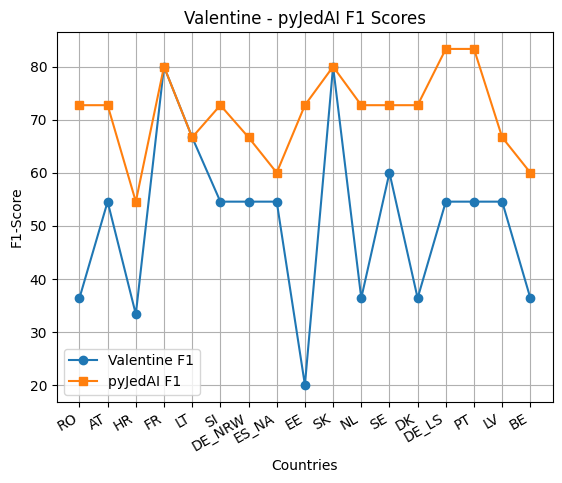

In [ ]:
import matplotlib.pyplot as plt
# Example data

# Create plot
# plt.figure(figsize=(17,17))
plt.plot(countries_to_list, VAL_f1_scores, marker="o", label="Valentine F1")
plt.plot(countries_to_list, f1_scores, marker="s", label="pyJedAI F1")

# Labels and title
plt.xlabel("Countries")
plt.ylabel("F1-Score")
plt.title("Valentine - pyJedAI F1 Scores")
plt.legend()
plt.grid(True)

plt.xticks(rotation=30, ha="right")   # rotate country names


# Show plot
plt.show()



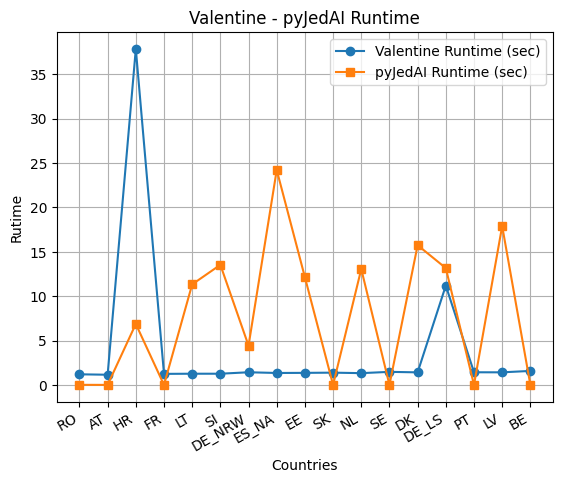

In [57]:
import matplotlib.pyplot as plt
# Example data

# Create plot
# plt.figure(figsize=(17,17))
plt.plot(countries_to_list, VAL_runtime, marker="o", label="Valentine Runtime (sec)")
plt.plot(countries_to_list, runtime, marker="s", label="pyJedAI Runtime (sec)")

# Labels and title
plt.xlabel("Countries")
plt.ylabel("Rutime")
plt.title("Valentine - pyJedAI Runtime")
plt.legend()
plt.grid(True)

plt.xticks(rotation=30, ha="right")   # rotate country names


# Show plot
plt.show()

